# Big Data y Machine Learning (UBA) -  2025

## Trabajo Práctico 1: Jugando con APIs y WebScraping 

### Reglas de formato y presentación
- El trabajo debe estar debidamente documentado comentado (utilizando #) para que tanto los docentes como sus compañeros puedan comprender el código fácilmente.

- El mismo debe ser completado en este Jupyter Notebook y entregado como tal, es decir en un archivo .ipynb


### Fecha de entrega:
Viernes 4 de Abril a las 13:00 hs

### Modalidad de entrega
- Al finalizar el trabajo práctico deben hacer un último <i>commit</i> en su repositorio de GitHub llamado “Entrega final del tp”. 
- Asegurense de haber creado una carpeta llamada TP1. Este Jupyter Notebook y el correspondiente al TP1 deben estar dentro de esa carpeta.
- También deben enviar el link de su repositorio -para que pueda ser clonado y corregido- a mi correo 25RO35480961@campus.economicas.uba.ar. Usar de asunto de email <i>"Big Data - TP 1 - Grupo #"</i> y nombrar el archivo <i>"TP1_Grupo #"</i> donde # es el número de grupo que le fue asignado.
- La última versión en el repositorio es la que será evaluada. Por lo que es importante que: 
    - No envien el correo hasta no haber terminado y estar seguros de que han hecho el <i>commit y push</i> a la versión final que quieren entregar. 
    - No hagan nuevos <i>push</i> despues de haber entregado su versión final. Esto generaría confusión acerca de que versión es la que quieren que se les corrija.
- En resumen, la carpeta del repositorio debe incluir:
    - El codigo
    - Un documento Word (Parte A) donde esten las figuras y una breve descripción de las mismas.
    - El excel con los links webscrappeados (Parte B)

### Parte A

In [2]:
pip install wbdata

Note: you may need to restart the kernel to use updated packages.


In [ ]:
#### Ejercicio 1 - Jugando con APIs
Usando la API del Banco Mundial [link](https://wbdata.readthedocs.io/en/stable/) , obtener dos series de indicadores para dos paises a elección en una consulta de búsqueda. Pueden buscar serie de indicadores de su interés.

In [3]:
# Resolver acá
# Paso 1: Importar las librerías necesarias
import wbdata
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Paso 2: Seleccionar indicadores visibles y relevantes
# Verificados previamente en https://data.worldbank.org/indicator
indicadores = {
    'NY.GDP.PCAP.CD': 'PIB_per_capita',  # PIB per cápita (US$ actuales) - Siempre disponible
    'SP.DYN.LE00.IN': 'esperanza_vida',   # Esperanza de vida al nacer (años) - Siempre disponible
    'IT.NET.USER.ZS': 'usuarios_internet' # Usuarios de Internet (% población) - Interesante para comparar
}

# Paso 3: Seleccionar países (códigos ISO de 3 letras)
paises = ['MEX', 'COL']  # México y Colombia

# Paso 4: Obtener datos de la API (con manejo de errores)
try:
    datos = wbdata.get_dataframe(indicadores, country=paises)
except Exception as e:
    datos = pd.DataFrame()  # DataFrame vacío si hay error

# Paso 5: Convertir a DataFrame y mostrar vista preliminar
if not datos.empty:
    df = pd.DataFrame(datos)
    df.reset_index(inplace=True)  # Convertir el índice en columnas normales
    print(df.groupby('country').head(2))  # Muestra 2 registros por país
else:
    print("No se pudieron obtener datos")

     country  date  PIB_per_capita  esperanza_vida  usuarios_internet
0   Colombia  2023     6947.359287             NaN               77.3
1   Colombia  2022     6674.596019          73.659               72.8
64    Mexico  2023    13790.024343             NaN               81.2
65    Mexico  2022    11385.407076          74.832               78.6


#### Ejercicio 2 - Repaso de Pandas
Realicen una estadistica descriptiva de ambas series de indicadores comparando los dos países.

In [6]:
# Resolver acá
# Paso 1: Verificar que tenemos datos
if not df.empty:
    print("\n📊 ESTADÍSTICAS DESCRIPTIVAS POR PAÍS E INDICADOR\n")
    
    # Paso 2: Configurar pandas para mostrar más decimales
    pd.set_option('display.float_format', '{:.2f}'.format)
    
    # Paso 3: Estadísticas generales
    print("🔹 Estadísticas generales para todos los datos:")
    print(df.describe())
    
    # Paso 4: Estadísticas por país
    for pais in df['country'].unique():
        print(f"\n🔹 Estadísticas para {pais}:")
        print(df[df['country'] == pais].describe())
    
    # Paso 5: Comparación directa de promedios
    print("\n🔹 COMPARACIÓN DIRECTA (PROMEDIOS):")
    comparacion = df.groupby('country').mean(numeric_only=True)
    print(comparacion)
    
    # Paso 6: Diferencia porcentual entre países
    print("\n🔹 DIFERENCIA PORCENTUAL (MEX/COL - 1):")
    diff = (comparacion.loc['Mexico'] / comparacion.loc['Colombia'] - 1) * 100
    print(diff.round(2).astype(str) + " %")


📊 ESTADÍSTICAS DESCRIPTIVAS POR PAÍS E INDICADOR

🔹 Estadísticas generales para todos los datos:
       PIB_per_capita  esperanza_vida  usuarios_internet
count          128.00          126.00              65.00
mean          3914.47           68.37              29.57
std           3530.17            5.89              27.58
min            258.30           55.02               0.00
25%            977.88           63.49               1.86
50%           2530.66           69.48              21.70
75%           6484.64           73.98              55.90
max          13790.02           76.75              81.20

🔹 Estadísticas para Colombia:
       PIB_per_capita  esperanza_vida  usuarios_internet
count           64.00           63.00              31.00
mean          2731.89           68.57              31.04
std           2506.36            5.64              28.10
min            258.30           57.13               0.00
25%            622.53           64.56               2.53
50%           16

#### Ejercicio 3 - Practicando con Matplotlib
Armen dos gráficos distintos usando la librería Matplotlib (repasen Clase 4). Uno programandolo con el estilo *pyplot* y otro gráfico de estilo *orientada a objetos*


📈 GRÁFICO PIB PER CÁPITA (ESTILO PYPLOT)


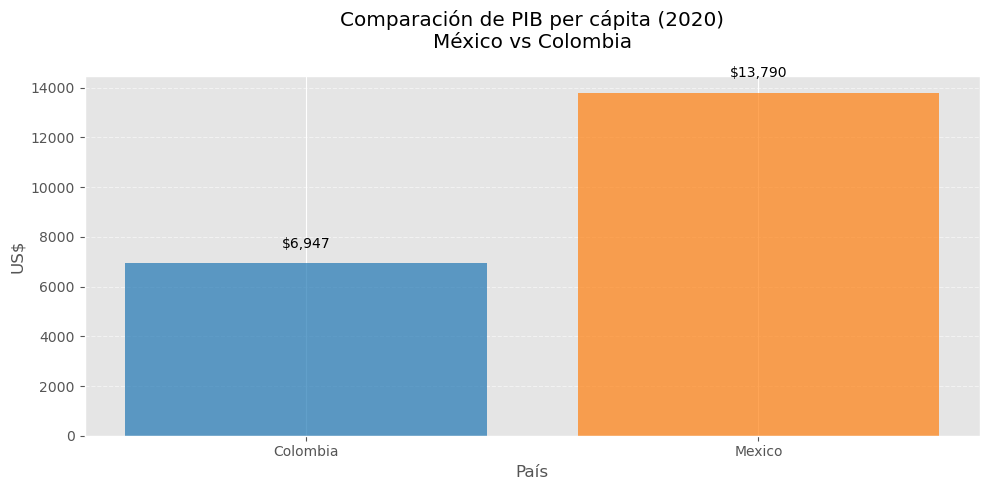

In [5]:
# Resolver acá estilo pyplot
# Filtramos datos para el año más reciente disponible
df_reciente = df[df['date'] == df['date'].max()]

if not df_reciente.empty:
    print("\n📈 GRÁFICO PIB PER CÁPITA (ESTILO PYPLOT)")
    
    # Configurar estilo
    plt.style.use('ggplot')
    plt.figure(figsize=(10, 5))
    
    # Gráfico de barras
    plt.bar(df_reciente['country'], df_reciente['PIB_per_capita'], 
            color=['#1f77b4', '#ff7f0e'], alpha=0.7)
    
    # Personalización
    plt.title('Comparación de PIB per cápita (2020)\nMéxico vs Colombia', pad=20)
    plt.xlabel('País')
    plt.ylabel('US$')
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    
    # Añadir etiquetas de valor
    for i, valor in enumerate(df_reciente['PIB_per_capita']):
        plt.text(i, valor + 500, f"${valor:,.0f}", ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()
else:
    print("No hay datos recientes para graficar.")

In [7]:
pip install wbdata

Note: you may need to restart the kernel to use updated packages.


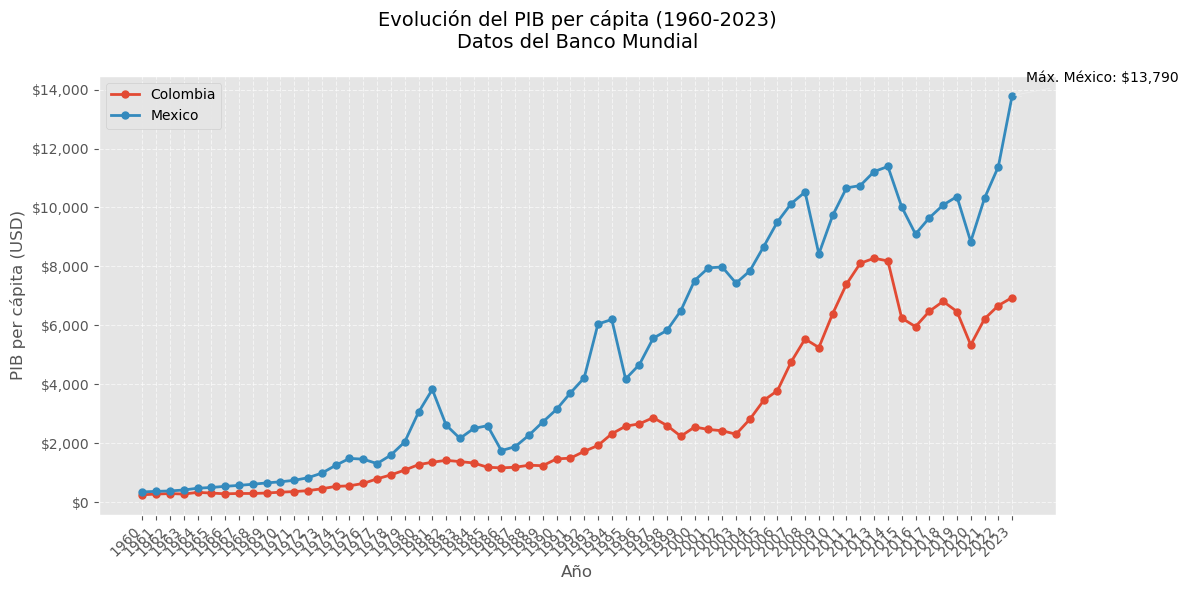

In [8]:
# Resolver acá estilo orientado-objetos 
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Filtrar y ordenar datos
df_pib = df[['country', 'date', 'PIB_per_capita']].dropna()
df_pib = df_pib.sort_values(by='date')

# Crear figura y eje (enfoque OO)
fig, ax = plt.subplots(figsize=(12, 6))

# Graficar series temporales para cada país
for country in df_pib['country'].unique():
    country_data = df_pib[df_pib['country'] == country]
    ax.plot(
        country_data['date'], 
        country_data['PIB_per_capita'], 
        marker='o',
        linestyle='-',
        linewidth=2,
        markersize=5,
        label=country
    )

# Personalización OO
ax.set_title('Evolución del PIB per cápita (1960-2023)\nDatos del Banco Mundial', 
             fontsize=14, pad=20)
ax.set_xlabel('Año', fontsize=12)
ax.set_ylabel('PIB per cápita (USD)', fontsize=12)
ax.grid(True, linestyle='--', alpha=0.6)
ax.legend(loc='upper left', framealpha=0.9)

# Formatear eje Y con separadores de miles
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))

# Rotar etiquetas del eje X para mejor legibilidad
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

# Añadir anotación para el pico máximo de México
max_mexico = df_pib[df_pib['country'] == 'Mexico']['PIB_per_capita'].max()
ax.annotate(f'Máx. México: ${max_mexico:,.0f}', 
            xy=(df_pib[df_pib['PIB_per_capita'] == max_mexico].iloc[0]['date'], max_mexico),
            xytext=(10, 10), textcoords='offset points',
            arrowprops=dict(arrowstyle='->'))

# Ajustar márgenes
fig.tight_layout()

plt.show()

### Parte B

#### Ejercicio 4
De la página de noticias del [diario La Nación](https://www.lanacion.com.ar/) o cualquier diario que les interese, utilicen herramientas de web scraping para obtener los **links** de las noticias de la portada. Guarden los links obtenidos en un dataframe y expórtenlo a un archivo de excel.

Nota 1: es posible que logren obtener los links a las noticias sin el dominio: "https://www.lanacion.com.ar/". De ser así, concatenen el dominio a la ruta del link obtenido, tal que se obtenga un link al que se pueda acceder. Es decir, que las cadenas de caracteres finales tendrán la forma: https://www.lanacion.com.ar/*texto_obtenido*)

Nota 2: junto con su entrega, adjunten una captura de la página de noticias al momento de correr su código. Eso servirá al momento de la corrección para verificar que los links obtenidos hacen referencia a las noticias de ese día y hora.

In [1]:
# Resolver acá
import requests  # Librería para hacer solicitudes HTTP y obtener datos de páginas web
from bs4 import BeautifulSoup  # Librería para extraer datos de HTML (web scraping)
import pandas as pd  # Librería para manipular datos en estructuras tipo tabla (DataFrame)
from IPython.display import display, HTML  # Permite mostrar tablas con formato en Jupyter Notebook

# Configuración inicial
url = "https://www.lanacion.com.ar/"  # URL del sitio web que vamos a analizar
headers = {"User-Agent": "Mozilla/5.0"}  # Encabezado para simular una solicitud desde un navegador real

try:
    # 1. Obtener el HTML de la página
    response = requests.get(url, headers=headers, timeout=10)  # Realiza la solicitud a la web
    response.raise_for_status()  # Lanza un error si la solicitud no es exitosa (ejemplo: página caída)
    soup = BeautifulSoup(response.text, 'html.parser')  # Convierte el HTML en un objeto analizable

    # 2. Extraer los contenedores principales de las noticias
    news_containers = soup.find_all(['article', 'section'], class_=lambda x: x and (
        'modulo' in x or 'com-card' in x or 'description-container' in x
    ))  # Busca elementos que contengan noticias dentro de las etiquetas <article> o <section>

    # 3. Filtrar y guardar los links de las noticias
    news_data = []  # Lista para almacenar los datos extraídos
    for container in news_containers:
        link_tag = container.find_parent('a', href=True) or container.find('a', href=True)  
        # Busca el enlace asociado a la noticia (puede estar en un padre o dentro del contenedor)
        
        if link_tag:  # Si se encuentra un enlace
            href = link_tag['href']  # Obtiene la URL del enlace
            full_url = f"https://www.lanacion.com.ar{href}" if href.startswith('/') else href  
            # Si la URL es relativa (empieza con "/"), le agregamos el dominio para obtener la URL completa
            
            title = container.find(['h1', 'h2', 'h3'], class_=lambda x: x and 'title' in x)  
            # Busca el título de la noticia en etiquetas <h1>, <h2> o <h3>
            
            title_text = title.get_text(strip=True) if title else "Sin título"  
            # Obtiene el texto del título si existe, si no, pone "Sin título"
            
            news_data.append({"Título": title_text, "Link": full_url})  # Guarda el título y link en la lista

    # 4. Eliminar duplicados y mostrar solo los primeros 6 resultados
    df = pd.DataFrame(news_data).drop_duplicates(subset=['Link']).head(6)  # Convierte la lista en DataFrame y deja solo 6 filas únicas
    
    if not df.empty:  # Si se encontraron noticias
        display(HTML(df.to_html(render_links=True, escape=False, index=False)))  
        # Muestra el DataFrame como una tabla con enlaces clickeables (en Jupyter Notebook)
        
        df.to_excel('portada_la_nacion.xlsx', index=False)  # Guarda el DataFrame en un archivo Excel
        
        print(f"✅ Se guardaron {len(df)} noticias principales.")  # Mensaje de éxito mostrando la cantidad de noticias guardadas
    else:
        print("⚠️ No se encontraron noticias con la estructura esperada.")  # Mensaje de alerta si no hay noticias

except Exception as e:
    print(f"❌ Error: {e}")  # Si ocurre un error, lo muestra en la consola

Título,Link
"La Corte.Con una posible derrota en el Senado, el Gobierno enfrenta un jueves clave en su vínculo con la Justicia",https://www.lanacion.com.ar/politica/con-una-posible-derrota-en-el-senado-el-gobierno-enfrenta-un-jueves-clave-en-su-vinculo-con-la-nid02042025/
Malvinas.El regreso de la política de “seducción” a los isleños que dispuso Milei genera polémica y rechazos,https://www.lanacion.com.ar/politica/el-regreso-de-la-politica-de-seduccion-a-los-kelpers-que-dispuso-milei-genera-polemica-y-rechazos-nid02042025/
Opinión.Acabo de ver el mundo del futuro y no está precisamente en Estados Unidos,https://www.lanacion.com.ar/el-mundo/acabo-de-ver-el-mundo-del-futuro-y-no-esta-precisamente-en-los-estados-unidos-de-trump-nid02042025/
Expectativa global.Incertidumbre por el inminente anuncio de Trump sobre la batería de nuevos aranceles de EE.UU.,https://www.lanacion.com.ar/estados-unidos/donald-trump-impone-nuevos-aranceles-en-vivo-impacto-y-reacciones-del-anuncio-del-2-de-abril-nid02042025/
"Sorpresa en Washington.Afirman que Trump le dijo a su círculo que Elon Musk se irá del gobierno, pero la Casa Blanca lo desmintió",https://www.lanacion.com.ar/estados-unidos/trump-le-dijo-a-su-circulo-intimo-que-elon-musk-se-alejara-de-la-casa-blanca-segun-politico-nid02042025/
"Discurso por Malvinas.Cristina Kirchner llamó ""pequeño hombrecito"" y ""cipayo"" a Milei",https://www.lanacion.com.ar/politica/el-dardo-de-cristina-kirchner-a-milei-por-malvinas-sobreideologizacion-desfinanciamiento-y-mala-nid02042025/


✅ Se guardaron 6 noticias principales.
